# Project: 50 Startups Data Analysis and Regression 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Visualization</a></li>
<li><a href="#eda">Data Cleaning</a></li>
<li><a href="#eda">Linear Regression</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and Data Exploration

### Dataset Description 

> This dataset contains information about 50 business startups, including 17 in each of the three states of New York, California, and Florida.
Profit, R&D spending, administration spending, category and marketing spending are the variables considered in the dataset. 

In [1]:
# import statements for packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading the dataset
df = pd.read_csv('/50_Startups_New22.csv')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,category
0,165349.20,136897.80,471784.10,New York,192261.83,music
1,162597.70,151377.59,443898.53,California,191792.06,enterprise
2,153441.51,101145.55,407934.54,Florida,191050.39,web
3,144372.41,118671.85,383199.62,New York,182901.99,software
4,142107.34,91391.77,366168.42,Florida,166187.94,games video


In [8]:
df['State'].nunique()

3

In [9]:
df['category'].nunique()

17

In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   category         50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


In [12]:
df.shape

(50, 6)

In [13]:
df.columns = df.columns.str.replace("category", "Category")

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Category
0,165349.20,136897.80,471784.10,New York,192261.83,music
1,162597.70,151377.59,443898.53,California,191792.06,enterprise
2,153441.51,101145.55,407934.54,Florida,191050.39,web
3,144372.41,118671.85,383199.62,New York,182901.99,software
4,142107.34,91391.77,366168.42,Florida,166187.94,games video


In [15]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
Category           0
dtype: int64

In [16]:
df[df == 0].count()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
Category           0
dtype: int64

In [17]:
len(df[df.duplicated()])

0

In [18]:
df.query('Category == "web"')

,R&D Spend,Administration,Marketing Spend,State,Profit,Category
2,153441.51,101145.55,407934.54,Florida,191050.39,web
9,123334.88,108679.17,304981.62,California,149759.96,web
11,100671.96,91790.61,249744.55,California,144259.40,web
12,93863.75,127320.38,249839.44,Florida,141585.52,web
18,91749.16,114175.79,294919.57,Florida,124266.90,web
22,73994.56,122782.75,303319.26,Florida,110352.25,web
28,66051.52,182645.56,118148.20,Florida,103282.38,web
30,61994.48,115641.28,91131.24,Florida,99937.59,web


<a id='intro'></a>
## Data Visualization

> The aim for visualization is to discover patterns and relationship between variables and the most common values in our dataset

In [19]:
def pie_chart(column):
    #quick function that visualizes a pie chart
    sorted_values = df[column].value_counts()
    pie_chart_colors=['#0A2342', '#FF7F50', '#9E9E9E']
    number = '%.1f%%'
    df.groupby(column).size().plot(kind='pie',autopct=number, colors=pie_chart_colors)
    plt.title("The distrubition of State in 50 Startups across the states")
    plt.axis("equal")
    #figure(figsize=(20,20))
    fig = plt.gcf()
    fig.set_size_inches(12.5, 8.5)
    plt.rcParams.update({'font.size': 24})

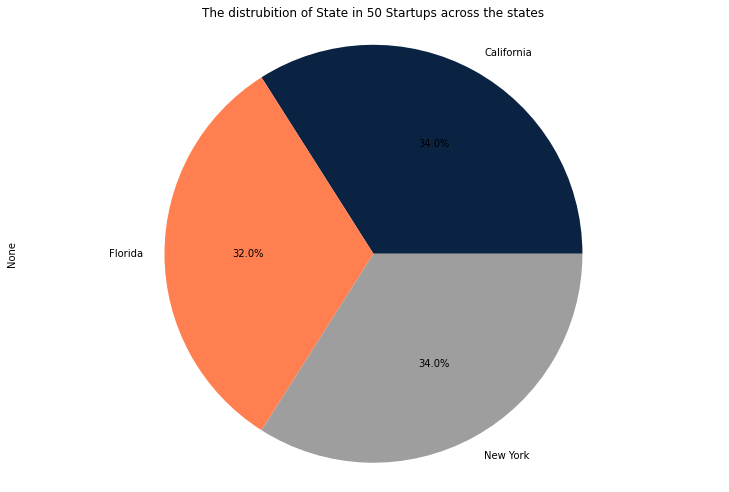

In [20]:
pie_chart('State')

**Insight**: California and New York are equally distrbuited while Florida has the least number of startups 

<AxesSubplot:xlabel='Category', ylabel='count'>

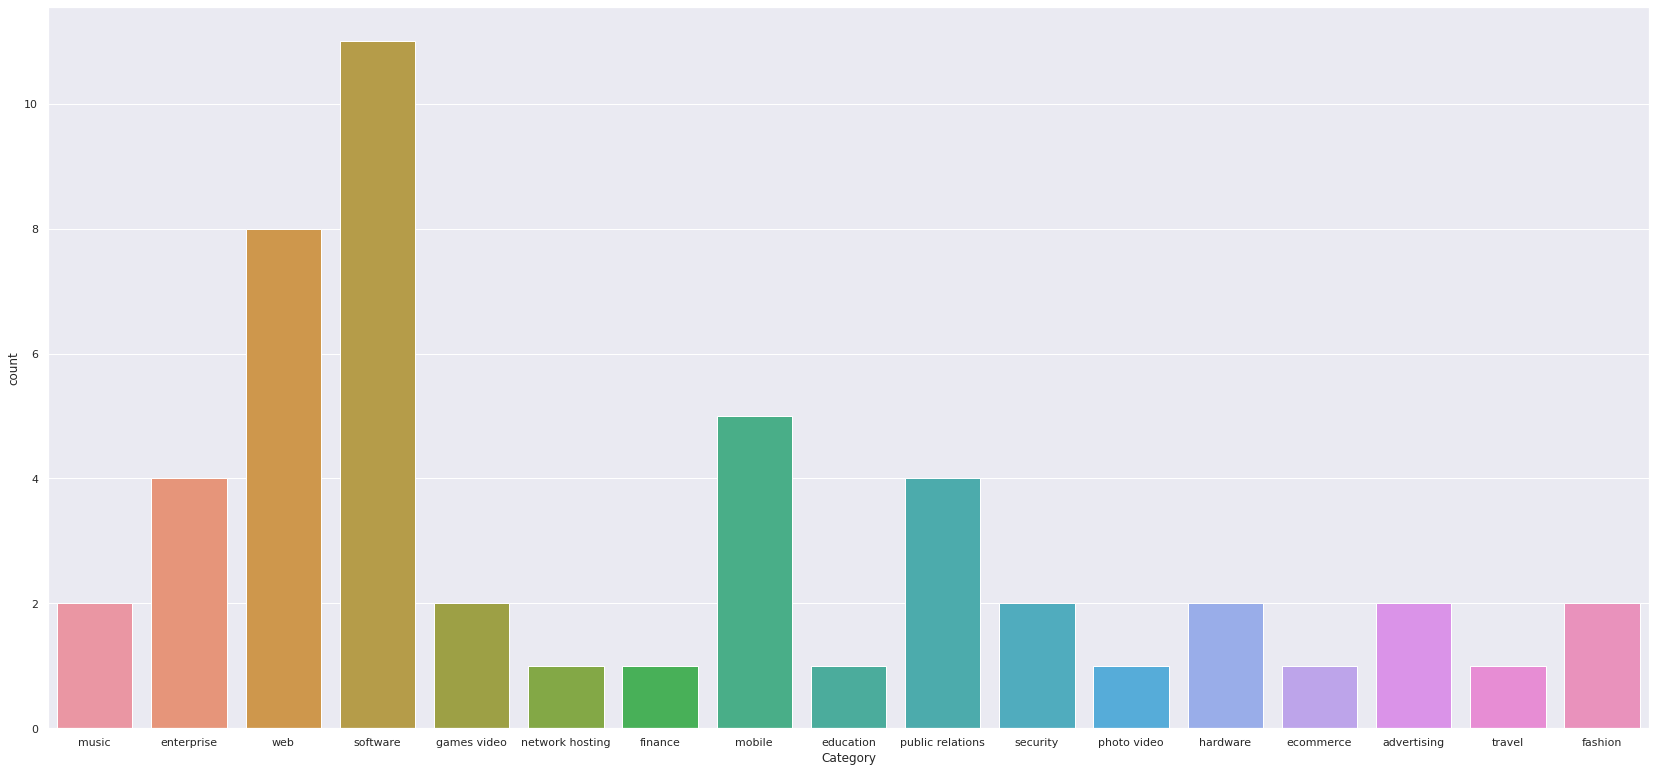

In [21]:
sns.set(font_scale=1.7)
sns.set(rc={'figure.figsize':(28.7,13.27)})
sns.countplot(data=df, x="Category")

**Software, Web and Mobile are the most common startup categories**

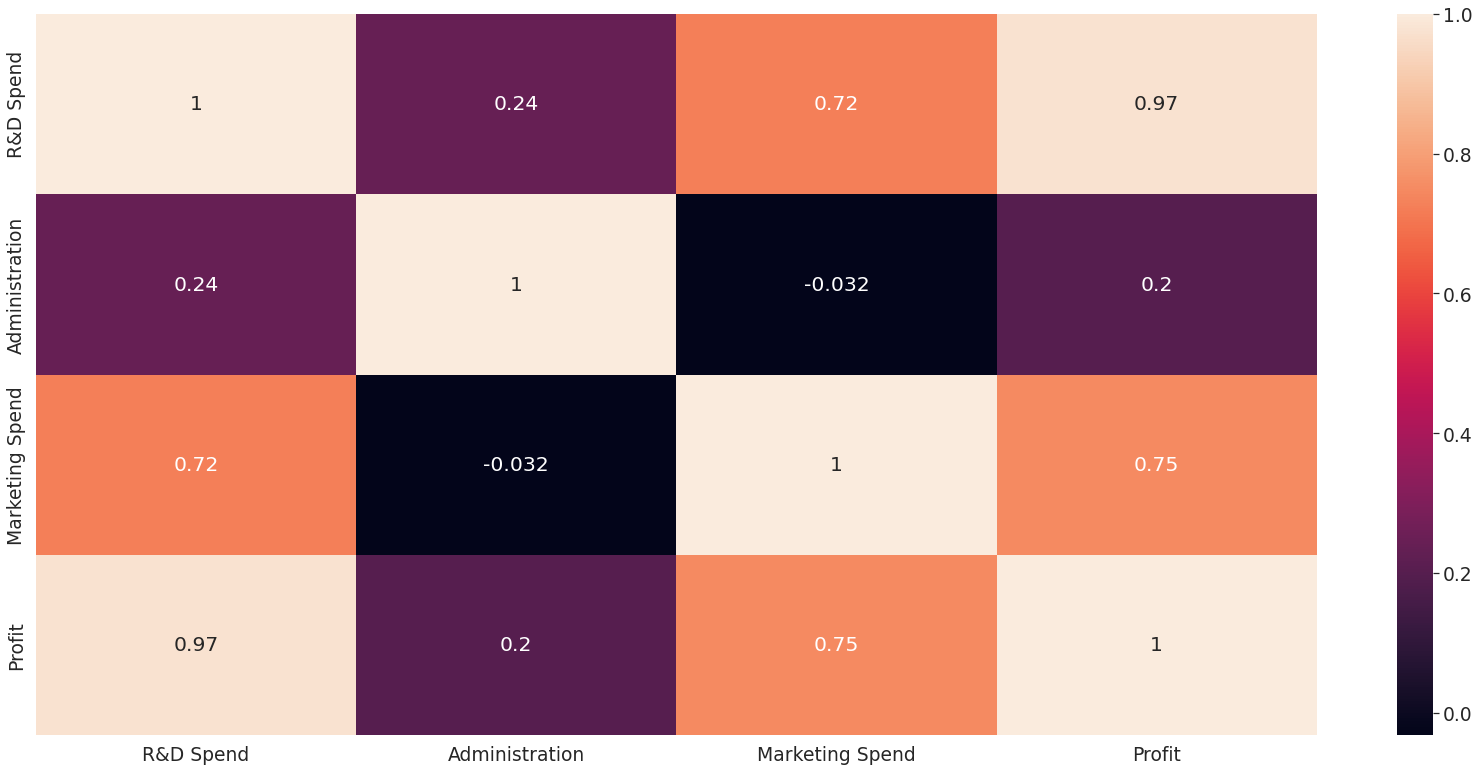

In [22]:
sns.set(font_scale=1.7)
sns.heatmap(df.corr(),annot=True)
plt.show()

**Insights:**
1. **R&D Spend is highly correlated with Profit and Marketing Spend** 
2.   **Profit is highly correlated with Marketing Spend**
3.   **Administration has low correlation with the other vairables**



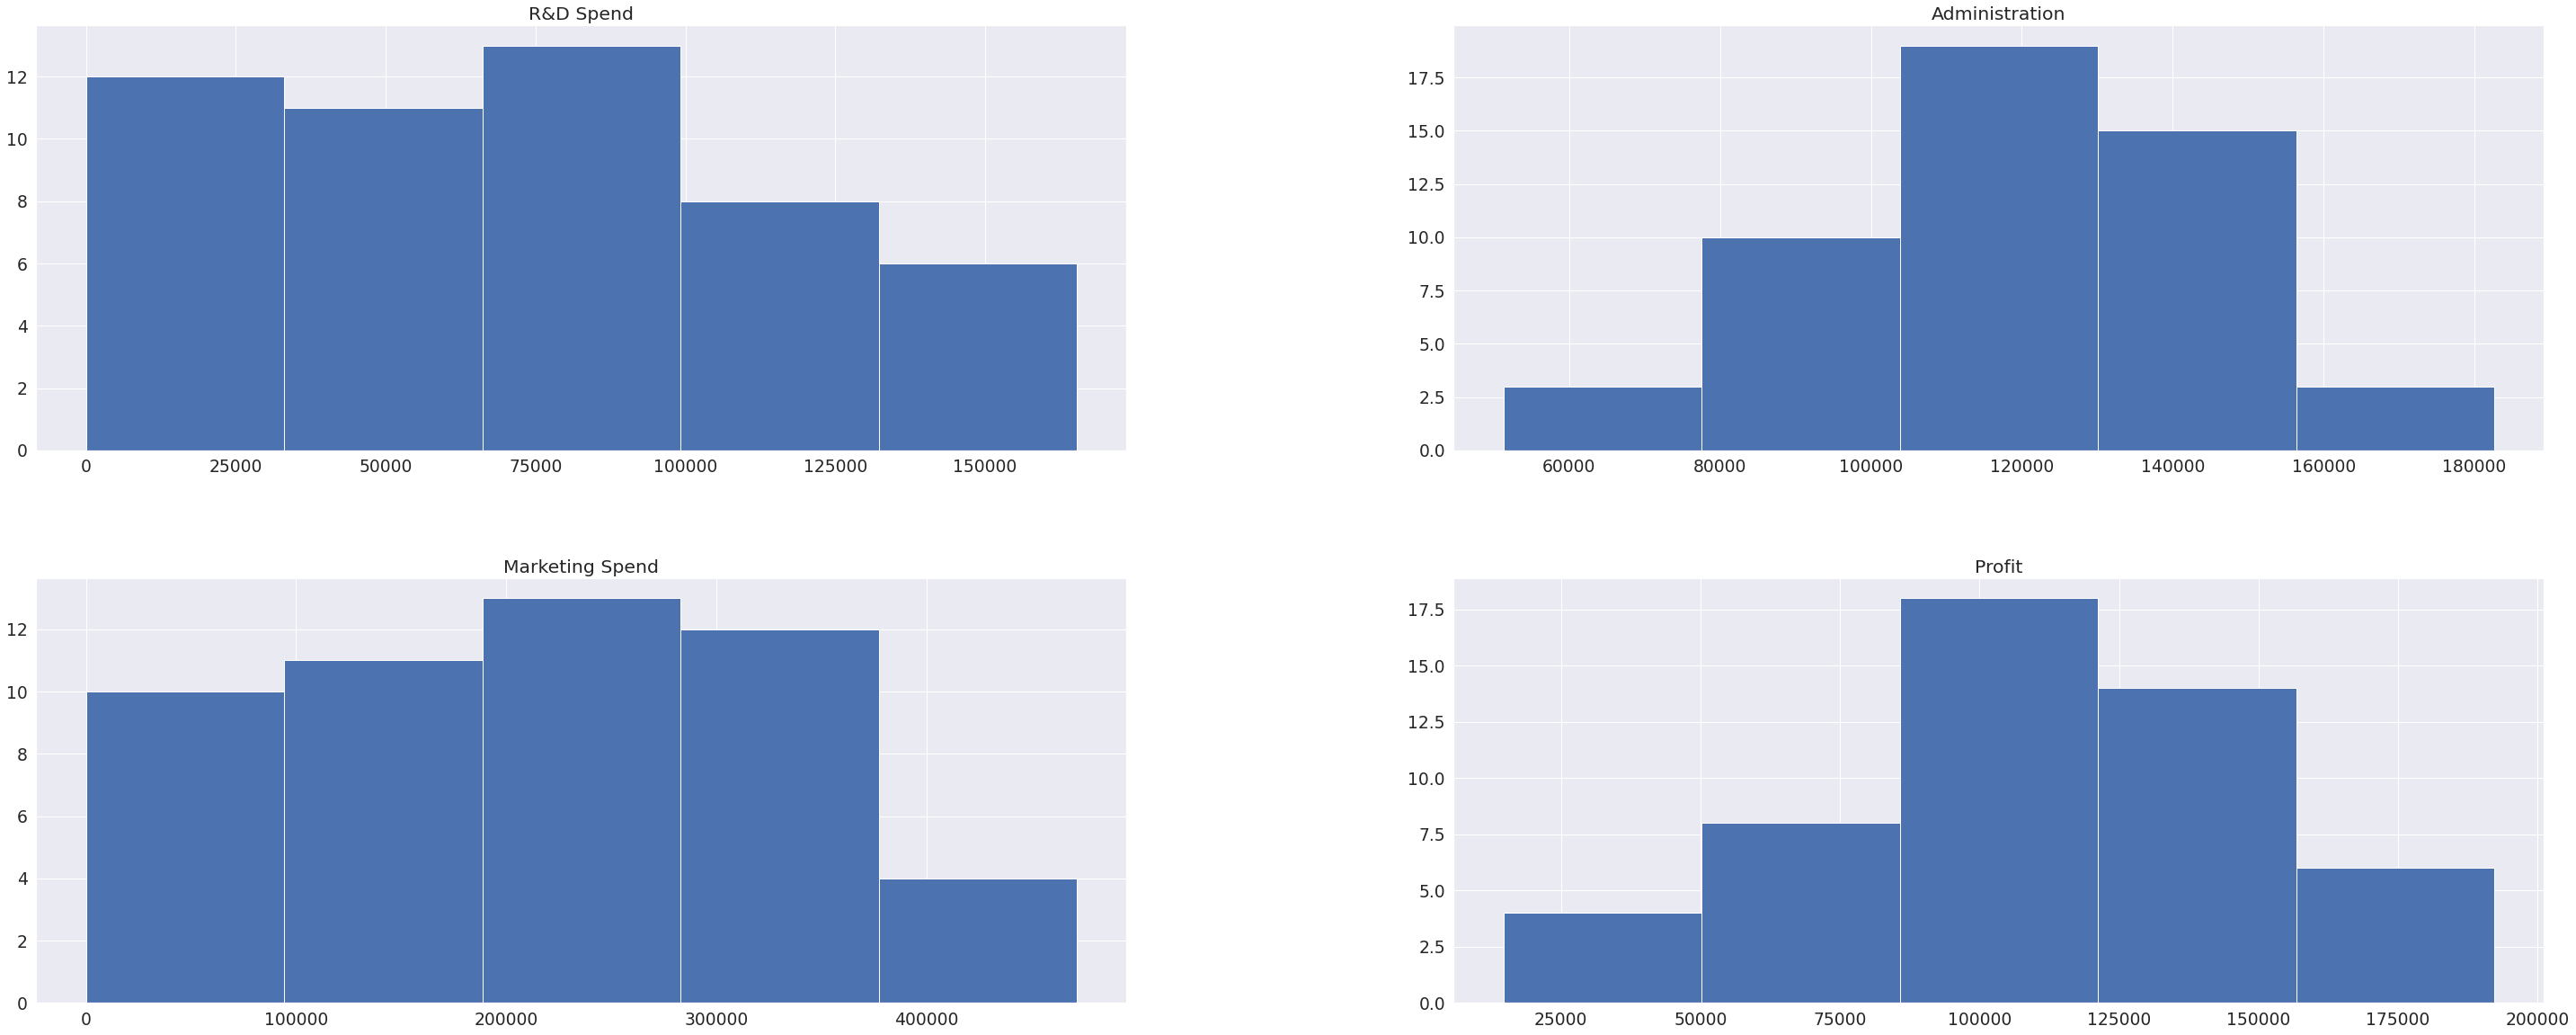

In [23]:
df.hist(figsize=(50,20),bins=5)
plt.show()

**Discovering Outliers using Boxplot**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

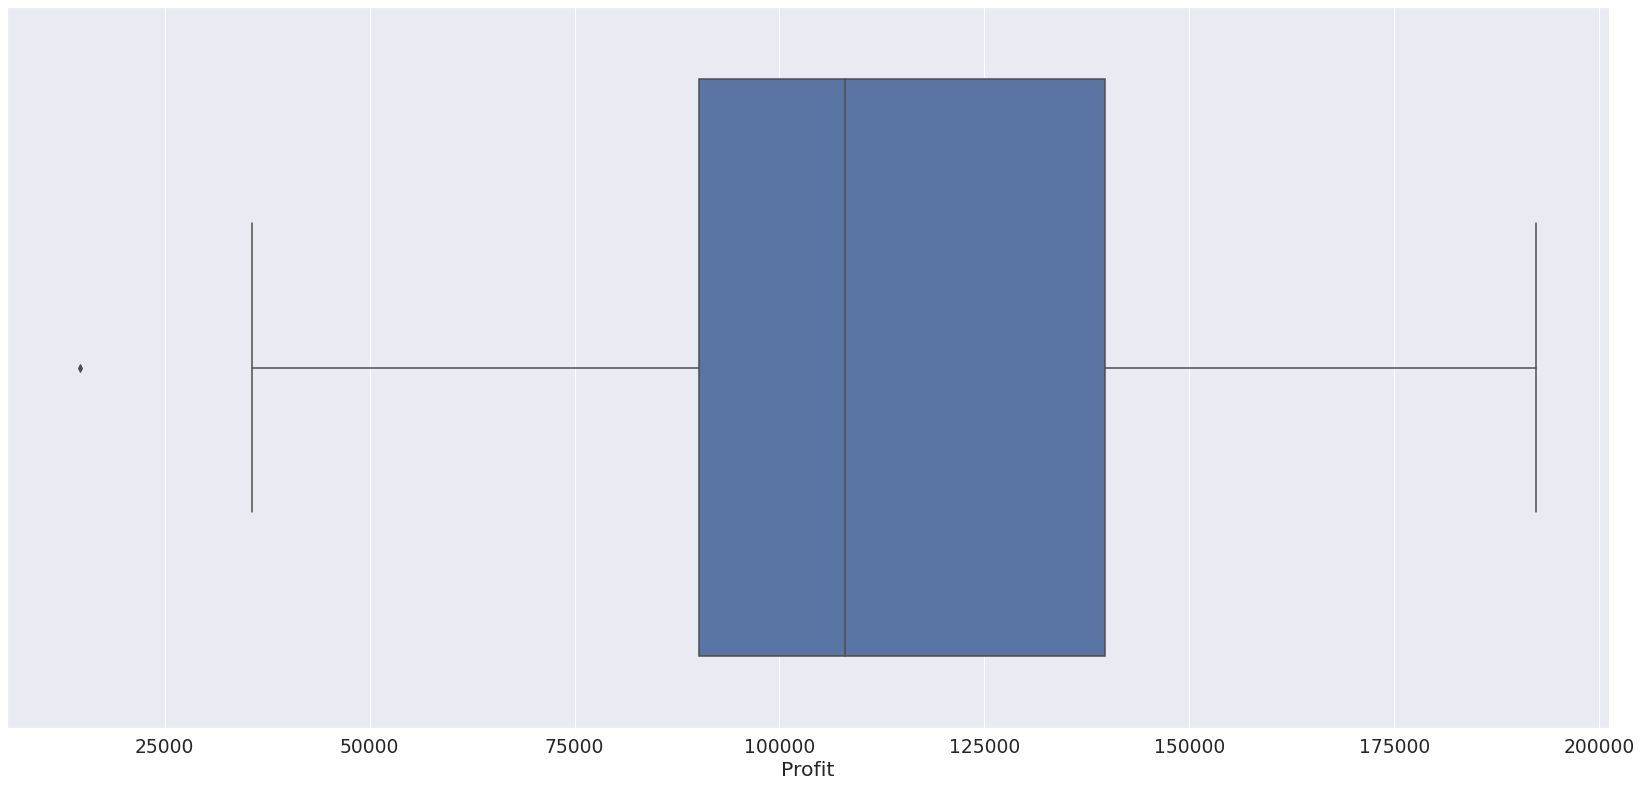

In [24]:
sns.boxplot(df['Profit'])

**The previous visualization demonstrates an outlier in the Profit column**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

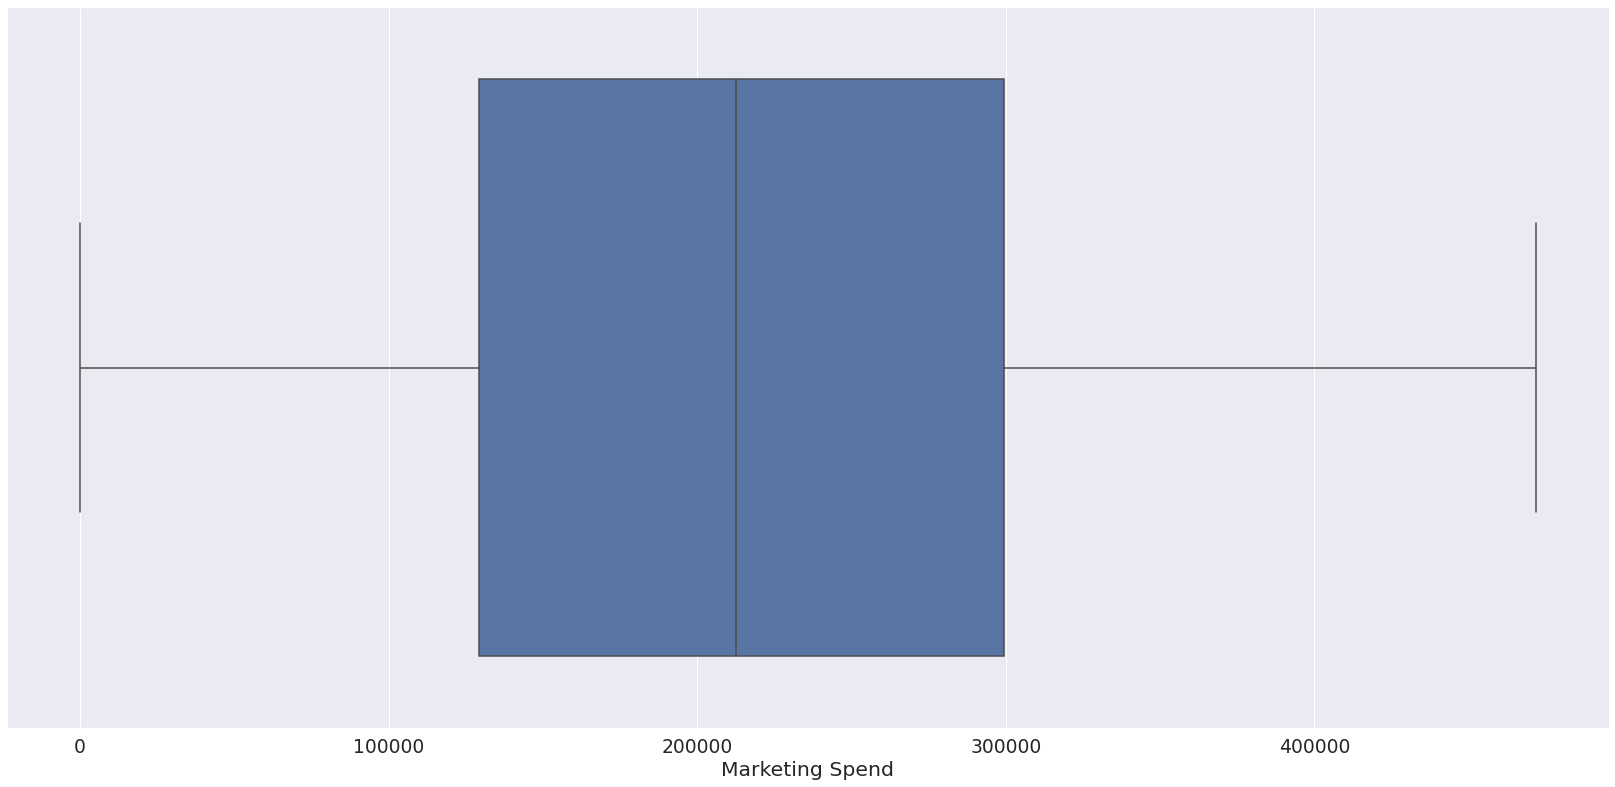

In [25]:
sns.boxplot(df['Marketing Spend'])

<AxesSubplot:>

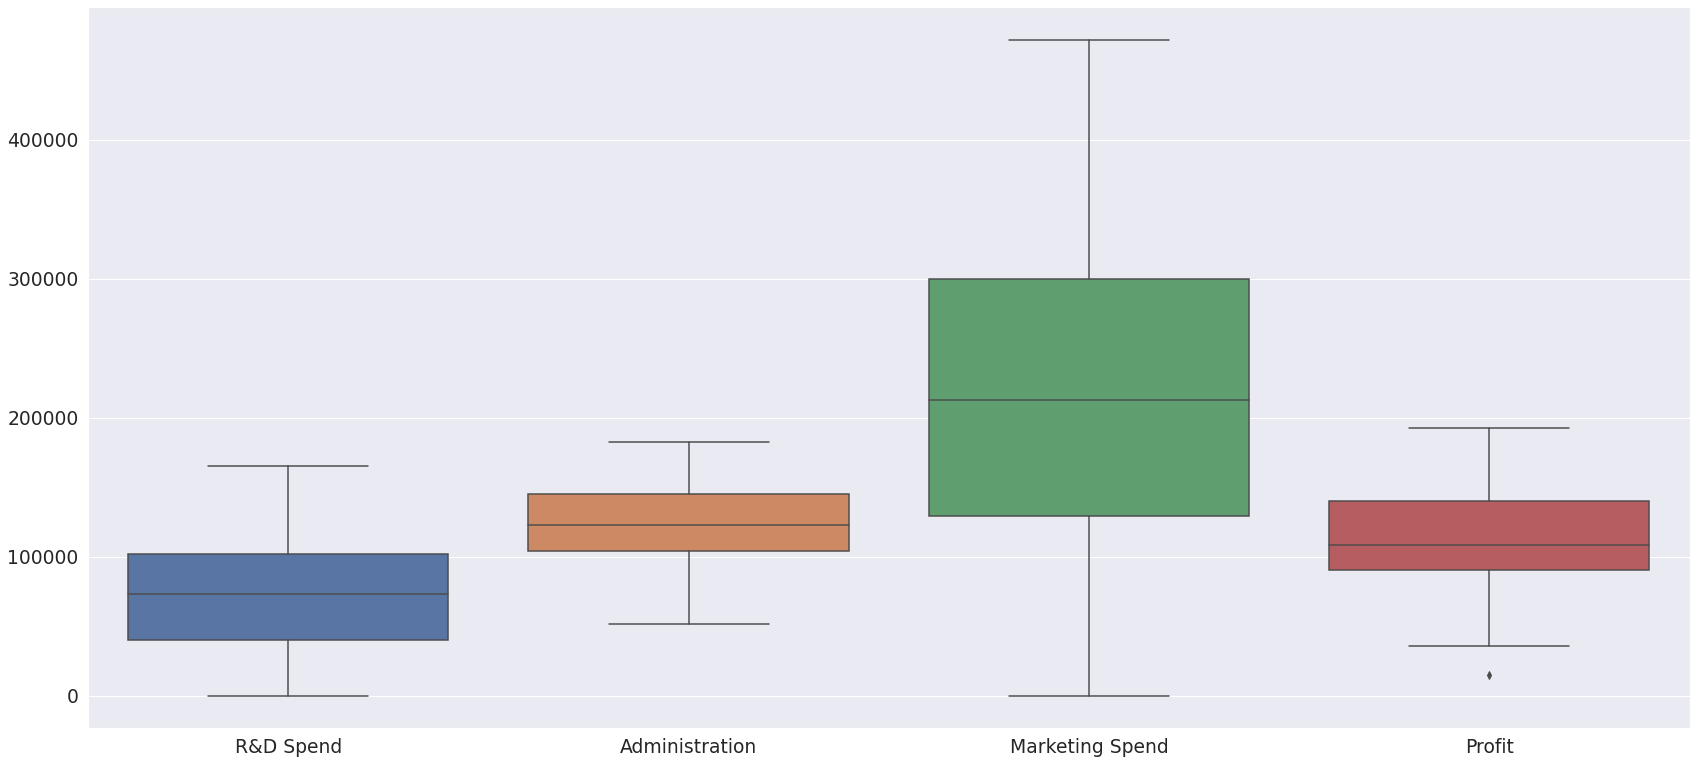

In [26]:
#to display the potetional of outliers in our dataset 
sns.boxplot(data=df)

**Insight: there is one outlier in Profit**

<a id='wrangling'></a>
## Data Cleaning
> **in this section, Data cleaning will be performed**

In [27]:
df[['Profit']].describe()

,Profit
count,50.000000
mean,112012.639200
std,40306.180338
min,14681.400000
25%,90138.902500
50%,107978.190000
75%,139765.977500
max,192261.830000


**Calculating the IQR to get rid of the outlier in the dataset** 

In [28]:
df['Profit'].quantile(0.25)

90138.9025

In [29]:
df['Profit'].quantile(0.75)

139765.97749999998

In [30]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
IQR = q3 - q1
IQR

49627.07499999998

In [31]:
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

In [32]:
lower_bound

15698.290000000023

In [33]:
upper_bound

214206.58999999997

In [34]:
outliers_low = (df['Profit'] < lower_bound)

In [35]:
outliers_high = (df['Profit'] > upper_bound)


In [36]:
 len(df['Profit']) - (len(df['Profit'][outliers_low]) + len(df['Profit'][outliers_high]))

49

In [38]:
df['Profit'][(outliers_low|outliers_high)]

49    14681.4
Name: Profit, dtype: float64

In [39]:
#removing the outlier
df['Profit'] = df['Profit'][(~outliers_low|outliers_high)]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

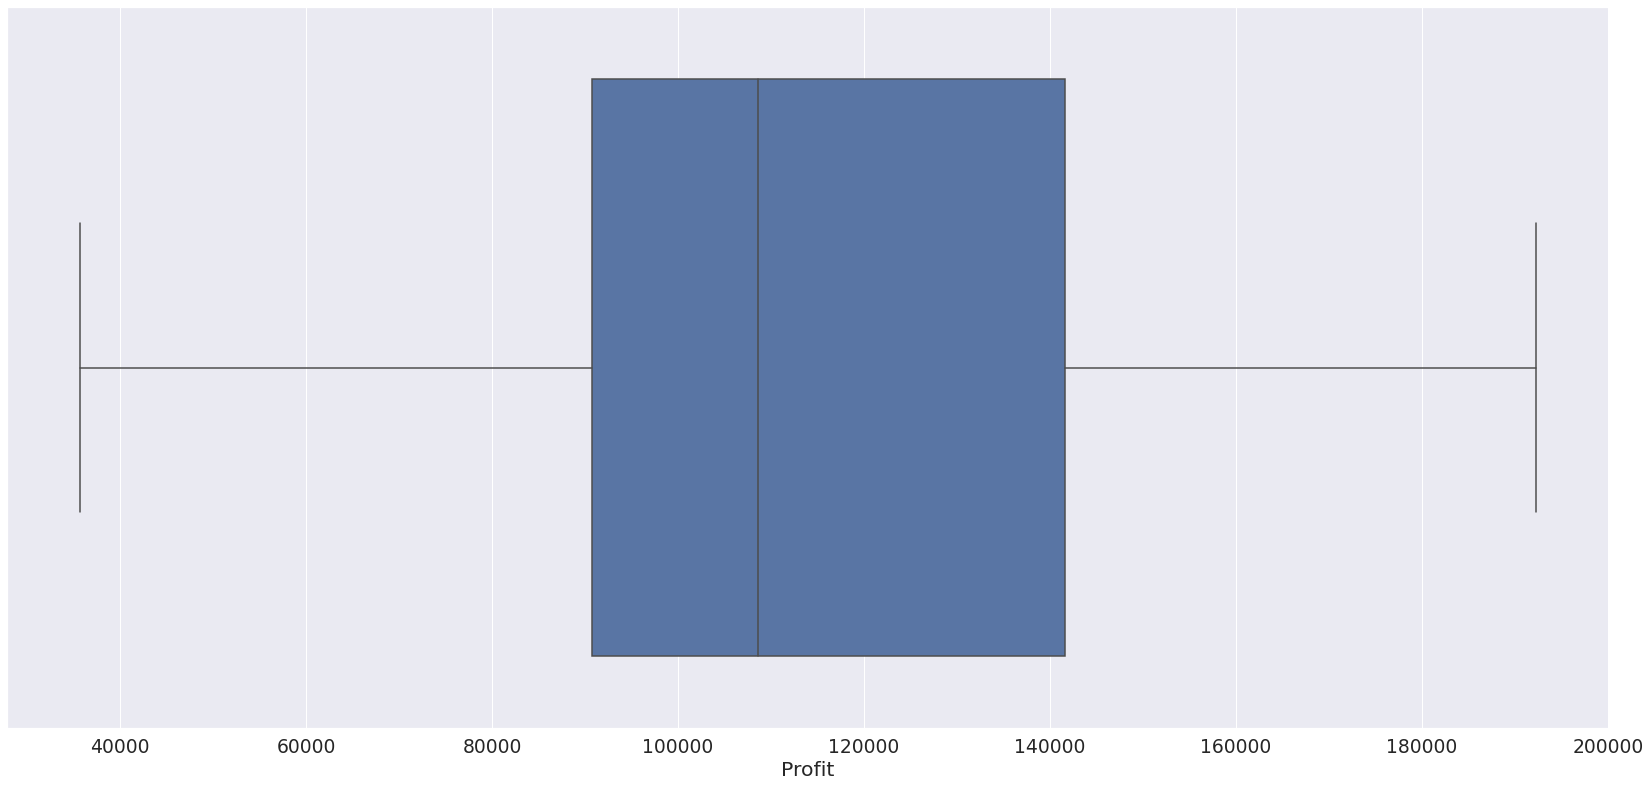

In [40]:
sns.boxplot(df['Profit'])

In [41]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             1
Category           0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
Category           0
dtype: int64

**as a result, there is no outlier in the profit column**

<a id='eda'></a>
## Regression

> **in this section we will use a linear regression model from Sklearn and Statsmodel to predict the profits**

In [44]:
#dummy variable for label enconding
state =pd.get_dummies(df['State'])
state

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [45]:
df_new = pd.concat([df,state],axis=1)
df_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Category,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,music,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,enterprise,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,web,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,software,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,games video,0,1,0


In [46]:
df_new.drop(columns='State', inplace=True)

In [47]:
df_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,Category,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,music,0,0,1
1,162597.70,151377.59,443898.53,191792.06,enterprise,1,0,0
2,153441.51,101145.55,407934.54,191050.39,web,0,1,0
3,144372.41,118671.85,383199.62,182901.99,software,0,0,1
4,142107.34,91391.77,366168.42,166187.94,games video,0,1,0


In [42]:
df2 = df.copy()

In [48]:
# label_encoder object knows how to understand word labels
from sklearn import preprocessing
label_encoder2 = preprocessing.LabelEncoder() 
df_new['Category']= label_encoder2.fit_transform(df_new['Category'])

In [57]:
#our features and label in the linear Regression model
features = df_new[['R&D Spend', 'Marketing Spend' , 'Administration', 'Category' ]]
target = df_new['Profit']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target ,test_size = 0.24, shuffle=True)

In [59]:
#linear regression model from Sklearn
from sklearn import linear_model
linear_regression_model = linear_model.LinearRegression()
#fitting the model
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [60]:
#label predition
y_pred = linear_regression_model.predict(x_test)

In [61]:
score = linear_regression_model.score(x_test, y_test)

In [62]:
score

0.9480600484128092

In [63]:
score_train = linear_regression_model.score(x_train, y_train)

In [64]:
score_train

0.962249350451577

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


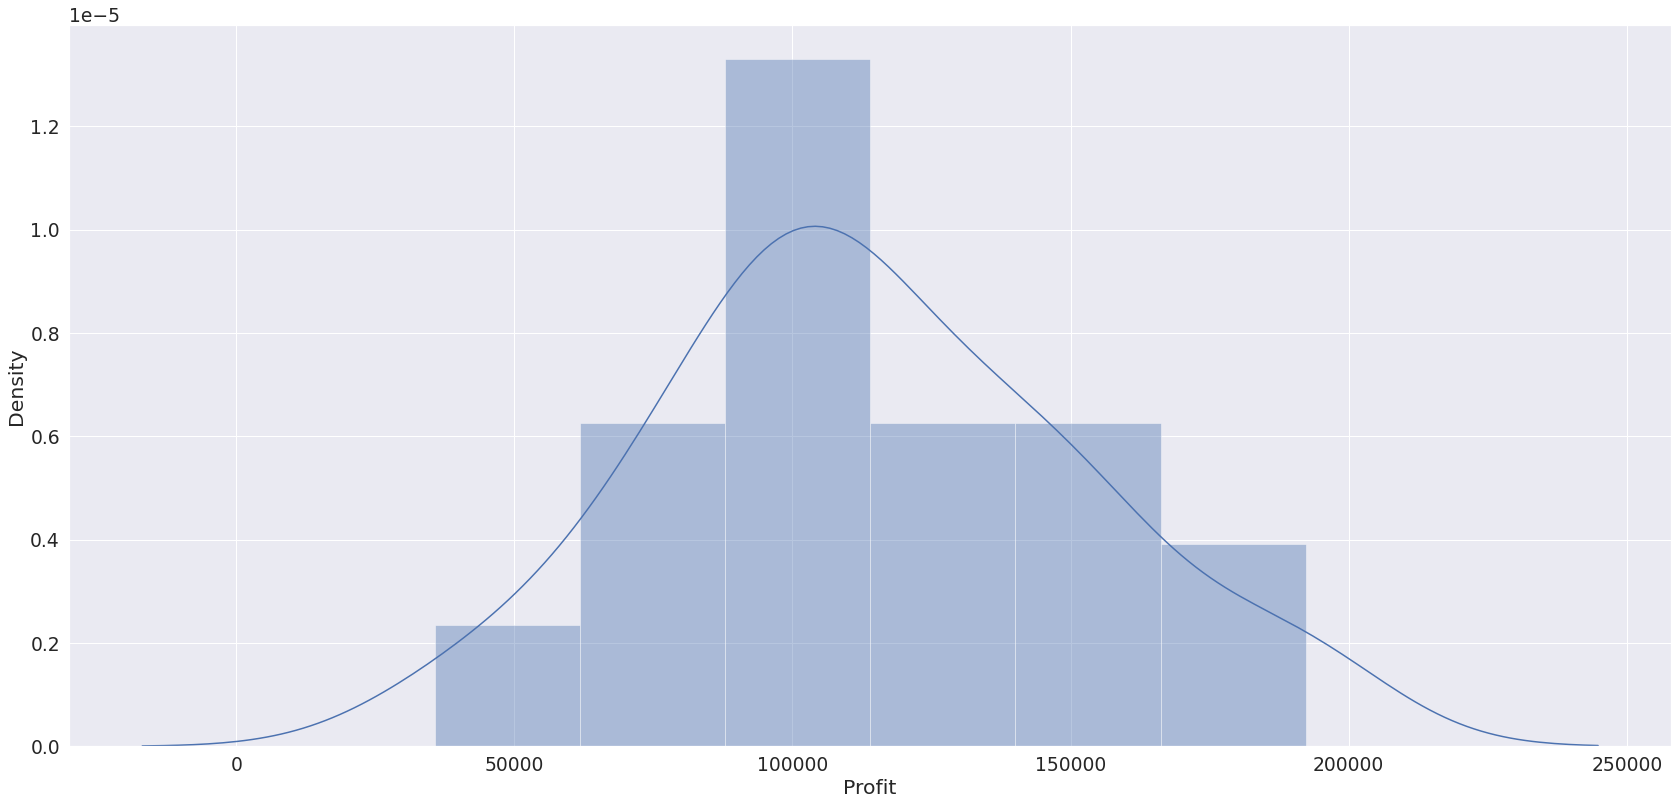

In [78]:
sns.distplot(target);

**the target histogram is normally distrubuted**

In [68]:
import statsmodels.api as sm;

In [75]:
df_new['intercept'] = 1
lm = sm.OLS(df_new['Profit'], df_new[['Administration','R&D Spend','Marketing Spend','Category']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1095.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                    3.38e-44
Time:                        07:23:01   Log-Likelihood:                         -530.22
No. Observations:                  49   AIC:                                      1068.
Df Residuals:                      45   BIC:                                      1076.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Administration      0.2916      0.037      7.836      0.000       0.217       0.367
R&D Spend           0.6867      0.061     11.319      0.000       0.564       0.809
Marketing Spend     0.0795      0.020      3.919      0.000       0.039       0.120
Category          798.4102    338.295      2.360      0.023     117.049    1479.772
==============================================================================
Omnibus:                        0.043   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.041
Skew:                           0.022   Prob(JB):                        0.980
Kurtosis:                       2.866   Cond. No.                     5.27e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.   **td err is the standard deviation of the corresponding variable’s coefficient across all the data points**
2.  **P value 0.000 means the null hypothesis is true.**
3.   **A null hypothesis is a claim that the two variables have no relationship with one another. .**

4.   **If Prob(F-statistic) is greater than 0.05, there is no evidence of relationship between any of the independent variable with the output**
5.  **Prob (F-statistic) is lower than 0.05, thus We can conclude that at least one variable has a strong relationship with the output names.**

6. **The better the model fits the given data, the greater the log-likelihood value.**




<a id='conclusions'></a>
## Conclusions

This project was created during the Google CDC Hackathon from March 12 to 15 to incorporate AI for the project idea and to promote the use of data analysis and machine learning to support entrepreneurs and startups founders. It accurately predicted the profit of 49 startups for platform users with a high accuracy of 91%. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])